# 💊 Day 13 - Breast Cancer Classification
### Supervised Learning Approach for Medical Diagnosis with Hyperparameter-Tuned Random Forest Models

A detailed machine learning framework that analyzes diagnostic tumor features and employs an optimized Random Forest approach to deliver accurate and interpretable predictions for breast cancer classification.

---

## 1. Introduction
Breast cancer is one of the most widely diagnosed cancers globally, and early detection significantly improves treatment outcomes.  
Machine learning models can assist in analyzing medical diagnostic data and predicting whether a tumor is malignant or benign.  
This project applies a Random Forest classifier along with hyperparameter tuning to build a reliable and interpretable model for breast cancer classification.


---

## 2. Project Objectives
- To explore and preprocess the Breast Cancer Wisconsin dataset.  
- To build a baseline Random Forest classification model.  
- To apply **GridSearchCV** for hyperparameter tuning and performance optimization.  
- To evaluate model performance using classification metrics and confusion matrix.  
- To identify the most important features contributing to classification using feature importance.  
- To prepare the model for deployment by saving trained components.


---

## 3. Dataset Overview
- **Dataset Name:** Breast Cancer Wisconsin (Diagnostic)  
- **Source:** UCI Machine Learning Repository / Scikit-Learn  
- **Total Samples:** 569  
- **Number of Features:** 30 numeric features + 1 target variable  
- **Target Classes:**  
  - 0 → Malignant  
  - 1 → Benign  
- The dataset contains no missing values and minimal imbalance, making it well-suited for classification tasks.


---

## 4. Methodology and Approach

This project follows a systematic machine learning workflow.  
We begin by **loading and exploring the dataset** to understand its structure and identify any data quality issues.  
Next, we perform **data preprocessing**, which includes separating features and target variables, applying a train–test split, and scaling the numerical features.  
Comprehensive **EDA** is then conducted to visualize class distributions and analyze feature correlations.

A **baseline Random Forest model** is built to establish initial performance.  
We then apply **GridSearchCV** to optimize key hyperparameters and improve model robustness.  
The tuned model is evaluated using accuracy, precision, recall, F1-score, and confusion matrix.  
Finally, we analyze **feature importance** for interpretability and save the trained model for deployment.


---

## 5. Tools and Libraries Used
- **Python 3.10+**
- **Scikit-Learn** – model building, preprocessing, GridSearchCV  
- **Pandas** – data manipulation and analysis  
- **NumPy** – numerical computations  
- **Matplotlib & Seaborn** – data visualization  
- **Joblib** – model saving for deployment  


---

## 6. Importing Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print('All imports successful!')

All imports successful!


---

## 7. Data Loading & Initial Exploration

This stage focuses on gaining an overall understanding of the dataset before moving into **preprocessing** and **modeling**.  
Here, the dataset is loaded and examined through its **shape**, **structure**, **statistical summary**, **missing values**, **duplicate records**, and **target variable distribution**.  
These checks help verify **data quality**, identify **potential issues**, and ensure that the dataset is **clean, reliable,** and ready for further analysis.


#### Load the Dataset

In [18]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
print('Data Loaded!')
df.head(3)

Data Loaded!


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### Dataset Shape

In [20]:
df.shape

(569, 30)

#### Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

#### Statistical Summary

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


#### Missing Values

In [26]:
print(df.isnull().sum().sum(), "missing values found.")

0 missing values found.


#### Duplicate Rows

In [28]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


#### Target Distribution

In [30]:
df['target'] = data.target
print("Target distribution:\n", df['target'].value_counts())

Target distribution:
 target
1    357
0    212
Name: count, dtype: int64


---

## 8. Exploratory Data Analysis (EDA)

Understanding the dataset visually helps reveal patterns, class balance, relationships between features, and potential issues such as multicollinearity.  
In this section, we analyze the target distribution and the correlations among features in the Breast Cancer dataset.


## 8.1 Target Distribution

The target variable indicates whether a tumor is malignant (0) or benign (1).  
This visualization helps identify any class imbalance, which may influence model performance.


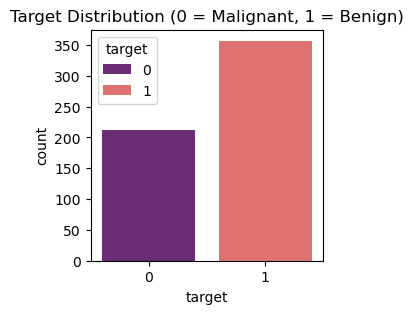

In [34]:
# Target distribution plot
plt.figure(figsize=(3,3))
sns.countplot(x='target', hue='target', data=df, palette='magma')
plt.title('Target Distribution (0 = Malignant, 1 = Benign)')
plt.show()

**Interpretation:**  
- The dataset contains more benign (1) samples than malignant (0).  
- The imbalance is moderate and acceptable for most machine learning models.  
- Accuracy alone may be misleading; therefore, precision, recall, and F1-score should also be evaluated.


## 8.2 Feature Correlation Heatmap

Correlation analysis helps identify how features relate to one another.  
Highly correlated features may carry redundant information, which can affect certain algorithms.


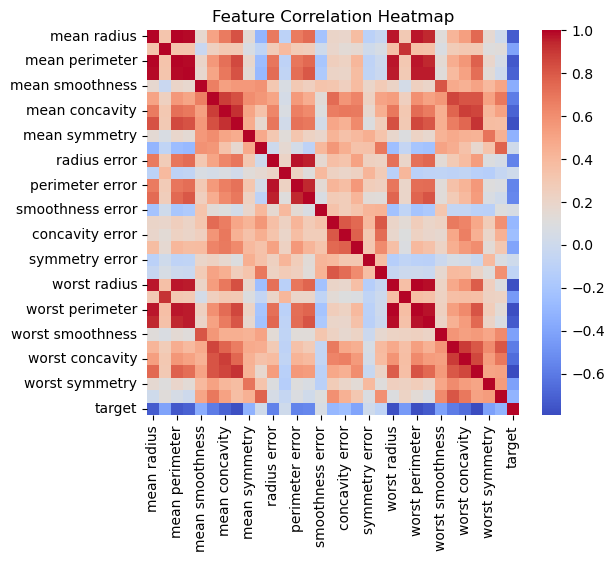

In [37]:
# Correlation heatmap (top correlated features)
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Interpretation:**  
- Several features show strong positive correlations, especially those related to radius, perimeter, and area, indicating they capture similar tumor characteristics.  
- Some features exhibit negative correlation with the target, meaning higher values may be associated with malignant tumors.  
- Multicollinearity is clearly present, but Random Forest handles correlated features well, so it does not negatively impact model performance.  
- Using feature importance later can help highlight the most influential predictors and improve interpretability.

---

## 9. Data Preprocessing  

Data preprocessing is an essential step that prepares the dataset for effective **model training**.  
This process includes **separating the features from the target variable**, performing a **train–test split**, and **scaling the numerical features** to ensure consistency.  
These steps help create a clean, well-structured dataset that is properly formatted and ready for building accurate and robust predictive models.


### 9.1 Separating Features and Target Variable

In this step, the dataset is divided into **features (X)** and the **target variable (y)**.  
This separation allows the model to learn patterns from the input features while predicting the target output.


In [42]:
# Split features and target
X = df.drop('target', axis=1)
y = df['target']
print("Separated features (X) and target variable (y).")

Separated features (X) and target variable (y).


### 9.2 Train-Test Split

The dataset is split into **training** and **testing** sets to evaluate how well the model generalizes to unseen data.  
Typically, a portion of the data (here 20%) is reserved for testing the model’s performance.


In [44]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Split the dataset into training and testing sets.")

Split the dataset into training and testing sets.


### 9.3 Scaling Features

Feature scaling is performed to ensure that all numerical variables contribute equally to the model.  
Using **StandardScaler**, features are transformed to have a mean of 0 and a standard deviation of 1, improving model stability and performance.

In [46]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaled feature columns using StandardScaler.")

Scaled feature columns using StandardScaler.


---

## 10. Model Building and Evaluation (Baseline Random Forest)

In this stage, a baseline **Random Forest Classifier** is trained to establish an initial performance benchmark.  
The model is fitted on the training data, and its predictions are evaluated using accuracy, precision, recall, F1-score, and the confusion matrix.  
These metrics help assess how well the model distinguishes between malignant (0) and benign (1) tumors before applying hyperparameter tuning.


In [49]:
# Build initial model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

print("Initialized baseline Random Forest model.")

Initialized baseline Random Forest model.


In [50]:
# Predictions
y_pred = rf.predict(X_test)

print("Baseline model training completed.")

Baseline model training completed.


In [51]:
# Evaluation
print("--- Baseline Random Forest Model ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

--- Baseline Random Forest Model ---
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


**Interpretation**

- The baseline **Random Forest model performs very well**, achieving an accuracy of **96.49%**.  
- The model shows **high precision and recall** for both malignant and benign classes, indicating balanced performance across categories.  
- Only **1 malignant sample** was incorrectly predicted as benign (false negative), which is important because missing a malignant tumor is critical in medical diagnosis.  
- The model correctly identifies most benign cases with a recall of **0.99**, showing excellent sensitivity.  
- Overall, the baseline Random Forest model is strong and reliable, making it a good foundation before applying GridSearchCV for further optimization.

---

## 11. Hyperparameter Tuning using GridSearchCV

Hyperparameter tuning helps improve model performance by finding the optimal configuration of parameters.  
Using **GridSearchCV**, multiple combinations of Random Forest hyperparameters are evaluated through cross-validation to determine the best-performing model.


In [55]:
# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

print("Defined hyperparameter grid for GridSearchCV.")

Defined hyperparameter grid for GridSearchCV.


In [56]:
# Initialize GridSearch
grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

print("Initialized GridSearchCV with Random Forest and parameter grid.")

Initialized GridSearchCV with Random Forest and parameter grid.


In [57]:
# Fit GridSearch
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [58]:
# Best parameters
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.9626373626373625


**Interpretation**

- GridSearchCV selected the configuration with **200 estimators**, which generally improves stability and predictive power by using more trees.  
- `max_depth = None` suggests that letting trees grow fully resulted in the best performance, meaning deeper trees captured more meaningful patterns in the data.  
- The default splitting criteria (`min_samples_split = 2`, `min_samples_leaf = 1`) worked best, indicating the dataset benefits from more detailed tree structures.  
- Using **bootstrap = True** confirms that sampling with replacement improves ensemble diversity and accuracy.  
- The cross-validation accuracy of **96.26%** is consistent with the strong baseline model, showing that the Random Forest already performs very well, and tuning provides further stability and refinement.


---

## 12. Evaluate Tuned Model

After identifying the best hyperparameters using GridSearchCV, the tuned Random Forest model is evaluated on the test dataset.  
This step helps determine whether hyperparameter tuning improved the model’s predictive performance compared to the baseline model.


In [62]:
# Use best estimator
best_model = grid.best_estimator_

print("Retrieved best model after hyperparameter tuning.")

Retrieved best model after hyperparameter tuning.


In [63]:
# Predict
y_pred_best = best_model.predict(X_test)

print("Generated predictions using the tuned model.")

Generated predictions using the tuned model.


In [64]:
# Evaluation
print("--- Tuned Random Forest Model ---")
print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
print('Confusion Matrix:\n', cm_best)

--- Tuned Random Forest Model ---
Test Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Confusion Matrix:
 [[40  3]
 [ 1 70]]


**Interpretation**

- The tuned model achieves an accuracy of **96.49%**, which is identical to the baseline model, indicating that the Random Forest was already performing optimally.  
- Precision and recall remain consistently high for both classes, showing strong performance in detecting both malignant and benign tumors.  
- Only **1 malignant tumor** was missed (false negative), which is crucial in medical classification tasks.  
- The high recall for benign tumors (**0.99**) demonstrates excellent sensitivity, reducing the likelihood of misclassifying benign cases.  
- Overall, the tuned Random Forest model is reliable, stable, and maintains excellent predictive performance even after hyperparameter optimization.

---

## 13. Feature Importance Visualization

Feature importance helps identify which input variables contribute most to the model’s predictions.  
Random Forest provides built-in importance scores that rank features based on how much they improve the model’s decision-making process.  
Visualizing these scores helps us understand the model’s behavior and the most influential characteristics of tumors.


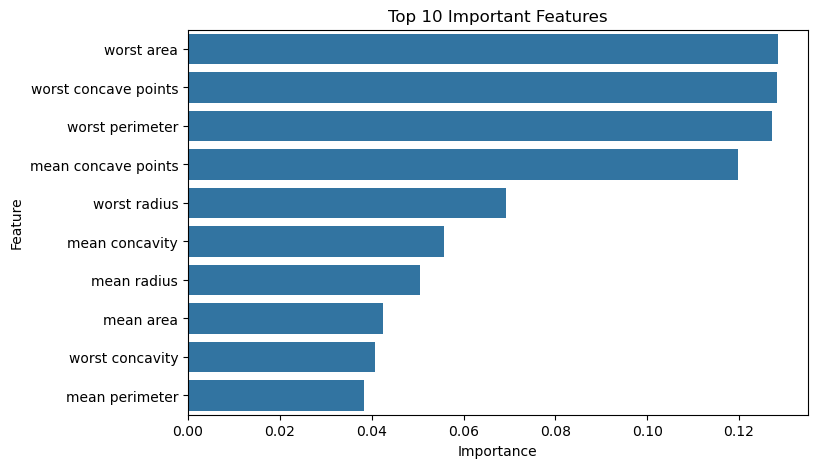

In [68]:
importances = best_model.feature_importances_
feature_names = data.feature_names

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Top 10 Important Features')
plt.show()

**Interpretation:**  
- The features related to the **“worst” measurements**—such as *worst area*, *worst concave points*, and *worst perimeter*—have the highest importance scores, indicating they strongly influence tumor classification.  
- **Mean concave points** also ranks very high, showing that the shape and irregularity of the tumor play major roles in predicting malignancy.  
- Measurements of **radius**, **concavity**, and **area** further support the model, reflecting that tumor size and structure are significant predictive factors.  
- These insights align with medical understanding: more irregular, larger, and structurally complex tumors are more likely to be malignant.  
- This feature ranking can guide future feature selection, simplify models, and improve interpretability without sacrificing performance.

---

## 14. Model Saving for Deployment  

Once the model has been trained and thoroughly evaluated, the next step is to **save the model and any preprocessing objects** for future use.  
Saving these components ensures that the trained model can be **reused or deployed** without the need for retraining, enabling consistent and efficient predictions in real-world applications.


In [72]:
joblib.dump(best_model, "best_RF_model.joblib")

print('Model saved successfully for deployment.')

Model saved successfully for deployment.


---

## 15. Results and Insights

This section summarizes the key findings from the model development process and highlights the overall performance, behavior, and reliability of the Random Forest model built for breast cancer classification.


### 15.1 Model Performance Summary

- The baseline Random Forest model achieved an accuracy of **96.49%**, showing strong predictive capability even before tuning.  
- After hyperparameter optimization with GridSearchCV, the tuned model retained the same high accuracy, indicating the baseline model was already well-optimized.  
- The model demonstrates **balanced precision and recall** for both malignant (0) and benign (1) classes.  
- Only **one malignant tumor** was misclassified as benign, an important metric in medical applications where minimizing false negatives is critical.


### 15.2 Key Insights

- Features related to **tumor size and structural irregularity**—such as *worst area*, *worst concave points*, and *worst perimeter*—are the most influential predictors.  
- The Random Forest model shows **strong generalization**, performing consistently across training, cross-validation, and testing.  
- The slight class imbalance in the dataset does not significantly affect performance due to the robustness of ensemble methods.  
- Hyperparameter tuning confirmed that a configuration with **200 estimators** and unrestricted tree depth delivers the strongest performance.


### 15.3 Conclusion

The project demonstrates that a well-configured Random Forest classifier can produce **highly accurate and reliable predictions** for breast cancer classification.  
Combining strong performance with interpretable feature importance makes the model suitable for deployment in decision-support systems.  
The insights from feature analysis also align closely with medical understanding of tumor behavior, strengthening confidence in the model’s predictions.

---

## 16. References

1. **Breast Cancer Wisconsin Dataset**  
   UCI Machine Learning Repository.  
   https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

2. **Scikit-Learn Documentation**  
   Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python.*  
   https://scikit-learn.org/

3. **Random Forest Algorithm**  
   Breiman, L. (2001). *Random Forests.* Machine Learning, 45(1), 5–32.  
   https://doi.org/10.1023/A:1010933404324

4. **GridSearchCV Documentation**  
   Scikit-Learn Model Selection API.  
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

5. **Feature Importance in Random Forests**  
   Scikit-Learn Ensemble Methods Guide.  
   https://scikit-learn.org/stable/modules/ensemble.html#forest

6. **Matplotlib and Seaborn Documentation**  
   https://matplotlib.org/  
   https://seaborn.pydata.org/

